In [3]:
#Hiyerarşik Kümeleme - Agglomerative/Divisive
import pandas as pd

In [4]:
customer_data = pd.read_csv('/kaggle/input/mall-customers-csv/Mall_Customers.csv')
customer_data.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [5]:
data = customer_data.iloc[:, 3:5].values
data

array([[ 15,  39],
       [ 15,  81],
       [ 16,   6],
       [ 16,  77],
       [ 17,  40],
       [ 17,  76],
       [ 18,   6],
       [ 18,  94],
       [ 19,   3],
       [ 19,  72],
       [ 19,  14],
       [ 19,  99],
       [ 20,  15],
       [ 20,  77],
       [ 20,  13],
       [ 20,  79],
       [ 21,  35],
       [ 21,  66],
       [ 23,  29],
       [ 23,  98],
       [ 24,  35],
       [ 24,  73],
       [ 25,   5],
       [ 25,  73],
       [ 28,  14],
       [ 28,  82],
       [ 28,  32],
       [ 28,  61],
       [ 29,  31],
       [ 29,  87],
       [ 30,   4],
       [ 30,  73],
       [ 33,   4],
       [ 33,  92],
       [ 33,  14],
       [ 33,  81],
       [ 34,  17],
       [ 34,  73],
       [ 37,  26],
       [ 37,  75],
       [ 38,  35],
       [ 38,  92],
       [ 39,  36],
       [ 39,  61],
       [ 39,  28],
       [ 39,  65],
       [ 40,  55],
       [ 40,  47],
       [ 40,  42],
       [ 40,  42],
       [ 42,  52],
       [ 42,  60],
       [ 43,

In [7]:
import matplotlib.pyplot as plt

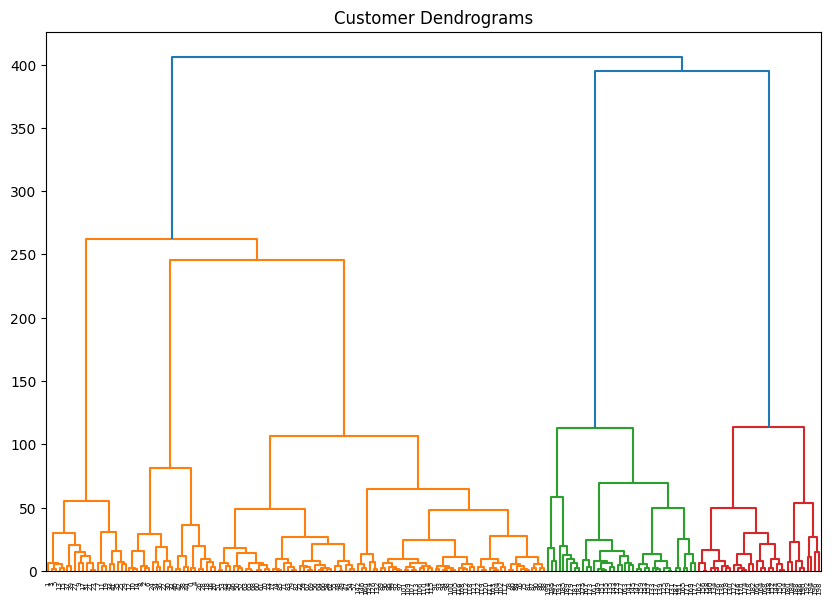

In [8]:
import scipy.cluster.hierarchy as shc

plt.figure(figsize = (10, 7))

plt.title('Customer Dendrograms')

dend = shc.dendrogram(shc.linkage(data, method = 'ward')) #ward's minimum variance method, single-complete-average

In [10]:
#Küme = 5 oldu
from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(n_clusters = 5, metric = 'euclidean', linkage = 'ward')

cluster.fit_predict(data)

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 1,
       4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 0, 2, 0, 2,
       1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2])

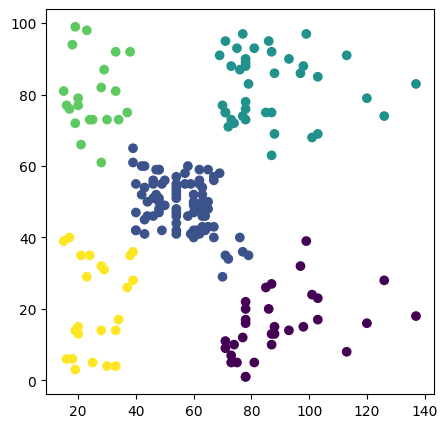

In [11]:
plt.figure(figsize = (5,5))
plt.scatter(data[:, 0], data[:, 1], c = cluster.labels_, cmap = 'viridis') #cmap = rainbow da alternatif
plt.show()

In [ ]:
#reinforcement-1
import gym
import time

env = gym.make('CartPole-v1', render_mode = 'human')

#Ortamı başlat
env.reset()

for _ in range(1000):
    env.render() #Ortamı görselleştir
    env.step(env.action_space.sample()) #Rastgele bir aksiyonu uygula
    time.sleep(0.05) #her adımda 50 ms bekle (hızı düşür)
    
env.close()

In [ ]:
#reinforcement-2
import gym
import time

env = gym.make('CartPole-v1', render_mode = 'human')

#20 episode (deneme) boyunca oyunu çalıştır
for episode in range(1, 21):
    print(f"\n EPISODE {episode} BAŞLIYOR. . .")
    
    observation, info = env.reset()
    
    #maksimum 100 adıma kadar çalıştır
    for step in range(1, 101):
        env.render() #ortamı görselleştir
        print(f"\n Adım {step}: Güncel Gözlem Verileri -> {observation}")
        
        #Rastgele bir aksiyon seç (0 -> sola it, 1 -> sağa it)
        action = env.action_space.sample()
        print(f"Seçilen Aksiyon: {action} ({'Sola İt' if action == 0 else 'Sağa İt'})")

        #Seçilen aksiyonu uygula ve yeni gözlemi al
        observation, reward, terminated, truncated, info = env.step(action)

        print(f"Alınan ödül: {reward}")

        #Eğer episode bittiyse (kutunun dengesi bozulduysa) çık
        if terminated or truncated:
            print(f"EPISODE {episode} BİTTİ! {step} adımda sona erdi.\n")
            time.sleep(2)
            break
        
    print(f"EPISODE {episode} başarıyla tamamlandı!\n")
    time.sleep(0.05)

env.close()
print("\nTüm Episodelar Tamamlandı!")        